# Misoprostol Marketplace (Facebook, Tokopedia)

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
import Sastrawi
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
marketplace = pd.read_csv("/content/Scrappping Penjualan Obat Marketplace FB  - Sheet1.csv")
marketplace

,Item URL,Price,Description,Location,Store,Platform
0,https://www.facebook.com/marketplace/item/1134...,NaN,NaN,NaN,NaN,NaN
1,https://www.facebook.com/marketplace/item/1842...,NaN,NaN,NaN,NaN,NaN
2,https://www.facebook.com/marketplace/item/7431...,Rp 100,Cytotek,Gresik,User,Facebook
3,https://www.facebook.com/marketplace/item/6500...,NaN,NaN,NaN,NaN,NaN
4,https://www.facebook.com/marketplace/item/2451...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
183,https://www.tokopedia.com/tokokknand/obat-miso...,Rp 850.000,OBAT MISO PAKET 1-6 BULAN GARANSI 300% UANG KE...,Jakarta Pusat,SECRET SHOPS ARCHIVED,Tokopedia
184,https://www.tokopedia.com/herbaltuntasalami/ob...,NaN,NaN,NaN,NaN,NaN
185,https://www.tokopedia.com/cycytoo/obat-telat-h...,NaN,NaN,NaN,NaN,NaN
186,https://tokopedia.com/jamutuntasalami/obat-tel...,Rp 15.000,obat telat hayd ampuh 1- 7 bulan amanah terper...,Yogyakarta,jamutuntasalami,Tokopedia


In [ ]:
marketplace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Item URL     188 non-null    object
 1   Price        75 non-null     object
 2   Description  75 non-null     object
 3   Location     75 non-null     object
 4   Store        75 non-null     object
 5   Platform     75 non-null     object
dtypes: object(6)
memory usage: 8.9+ KB


In [ ]:
marketplace.shape

(188, 6)

In [ ]:
jumlah_per_nilai = marketplace['Location'].value_counts().nlargest(10)
print(jumlah_per_nilai)

Location
Yogyakarta       10
Malang           10
Kediri            7
Indramayu         5
Banjarmasin       4
Tasikmalaya       4
Jakarta Pusat     3
Surakarta         3
Blitar            3
Kudus             2
Name: count, dtype: int64


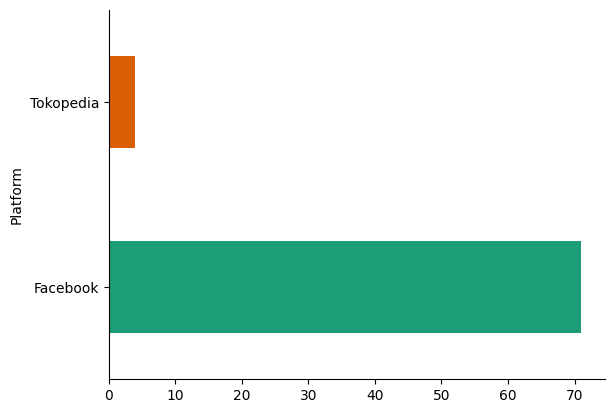

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
marketplace.groupby('Platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

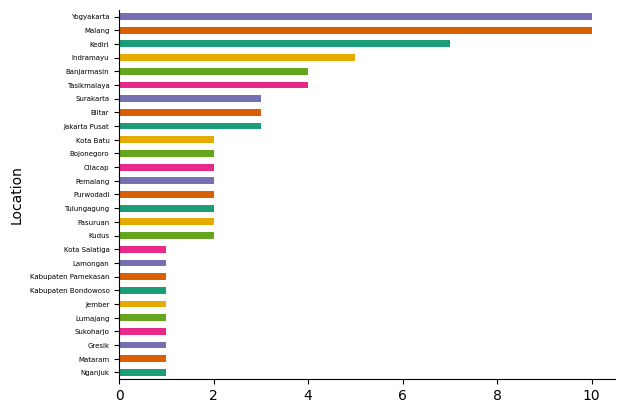

In [ ]:
sorted_marketplace = marketplace.groupby('Location').size().sort_values(ascending=True)
ax = sorted_marketplace.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
ax.tick_params(axis='y', labelsize=5)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
Lokasi = marketplace['Location']
Lokasi

0                NaN
1                NaN
2             Gresik
3                NaN
4                NaN
           ...      
183    Jakarta Pusat
184              NaN
185              NaN
186       Yogyakarta
187              NaN
Name: Location, Length: 188, dtype: object

In [ ]:
data = marketplace['Location']
Lokasi = pd.DataFrame(data)
Lokasi

,Location
0,NaN
1,NaN
2,Gresik
3,NaN
4,NaN
...,...
183,Jakarta Pusat
184,NaN
185,NaN
186,Yogyakarta


# Misoprostol from Twitter

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("processed_text_twitter.csv", sep=';')
#df = df[['created_at', 'Description', 'username', 'Item_url']]
df

,created_at,Description,username,Item_url
0,Thu Mar 07 01:30:20 +0000 2024,Ready stok 7 maret 2024 Obat aborsi #cytotec_2...,newsjessy686,https://twitter.com/newsjessy686/status/176555...
1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan https://t.co/4wc...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...
2,Wed Mar 06 23:04:53 +0000 2024,"Pesanan hari ini Via Tokopedia Rab,06 Maret 20...",ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...
3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok. Sat set bgt ...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...
4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at 7-9 March! We're cel...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...
...,...,...,...,...
1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...
1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...
1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...
1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   1841 non-null   object
 1   Description  1841 non-null   object
 2   username     1841 non-null   object
 3   Item_url     1841 non-null   object
dtypes: object(4)
memory usage: 57.7+ KB


In [ ]:
df.isna().sum()

created_at     0
Description    0
username       0
Item_url       0
dtype: int64

In [ ]:
df = df.drop_duplicates(subset='Item_url')
df

,created_at,Description,username,Item_url
0,Thu Mar 07 01:30:20 +0000 2024,Ready stok 7 maret 2024 Obat aborsi #cytotec_2...,newsjessy686,https://twitter.com/newsjessy686/status/176555...
1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan https://t.co/4wc...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...
2,Wed Mar 06 23:04:53 +0000 2024,"Pesanan hari ini Via Tokopedia Rab,06 Maret 20...",ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...
3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok. Sat set bgt ...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...
4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at 7-9 March! We're cel...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...
...,...,...,...,...
1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...
1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...
1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...
1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...


In [ ]:
def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
df["Description"] = df["Description"].apply(remove_links)

<ipython-input-8-fb724d121402>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Description"] = df["Description"].apply(remove_links)


In [ ]:
def remove_number(text):
    return  re.sub(r"\d+", " ", text)
df["Description"] = df["Description"].apply(remove_number)

<ipython-input-10-c08b22515001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Description"] = df["Description"].apply(remove_number)


In [ ]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df["Description"] = df["Description"].apply(remove_punctuation)

In [ ]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)
df["Description"] = df["Description"].apply(remove_singl_char)

<ipython-input-17-e62caf8777d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Description"] = df["Description"].apply(remove_singl_char)


In [ ]:
with open("rootword.txt", "r", encoding="utf-8") as file:
  rootword = file.read().splitlines()

# Buat DataFrame dari list stopword
rootword_df = pd.DataFrame(rootword, columns=["root_word"])

In [ ]:
def is_root_word(word, rootword_df):
    return word in set(rootword_df['root_word'])
def process_text(text, rootword_df):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    words = text.split()
    result = []

    for old_word in words:
        step = 1
        while True:
            # Check for semantically correct word in rootword_df
            if is_root_word(old_word, rootword_df):
                result.append(old_word)
                break
            # Remove one repeated character
            new_word = repeat_pattern.sub(match_substitution, old_word)
            if new_word != old_word:
                step += 1  # Update step
                # Update old word to last substituted state
                old_word = new_word
                continue
            else:
                result.append(new_word)
                break

    return ' '.join(result)

df['full_text_no_doubel'] = df['Description'].apply(process_text, rootword_df= rootword_df)

<ipython-input-20-c6501631eb9c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_no_doubel'] = df['Description'].apply(process_text, rootword_df= rootword_df)


### Normalize Text

In [ ]:
kamus_alay1 = pd.read_csv("kamusalay.csv", names=['slank', 'arti'])
kamus_alay2 = pd.read_csv("colloquial-indonesian-lexicon.csv")
kamus_alay2 = kamus_alay2[['slang','formal']]
kamus_alay2.columns = ['slank','arti']

In [ ]:
# Buka file teks
with open("kbba.txt", "r", encoding="utf-8") as file:
    # Baca seluruh isi file
    kamus_alay_text = file.read()

# Pisahkan teks menjadi baris-baris
kamus_alay_lines = kamus_alay_text.split("\n")

# Buat list untuk menyimpan kata alay dan artinya
kata = []
for line in kamus_alay_lines:
    # Pisahkan baris menjadi kata alay dan artinya
    alay, arti = line.split("\t")
    # Tambahkan ke list data
    kata.append([alay.strip(), arti.strip()])

# Buat DataFrame dari list data
kamus_alay3 = pd.DataFrame(kata, columns=['slank', 'arti'])


In [ ]:
kamus_alay = pd.concat([kamus_alay1, kamus_alay2, kamus_alay3, kamus_alay4], ignore_index=True)

In [ ]:
kamus_alay.duplicated().sum()

11163

In [ ]:
kamus_alay =kamus_alay.drop_duplicates()

In [ ]:
kamus_alay_dict = dict(zip(kamus_alay['slank'], kamus_alay['arti']))

In [ ]:
def replace_alay_words(text):
    # Pisahkan teks menjadi kata-kata
    words = text.split()
    # Gantikan kata alay dengan kata baku
    replaced_words = [kamus_alay_dict.get(word, word) for word in words]
    # Gabungkan kembali kata-kata menjadi teks
    return ' '.join(replaced_words)

In [ ]:
df['full_text_noalay'] = df['full_text_no_doubel'].apply(replace_alay_words)

<ipython-input-29-c1e8598b4ba0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_noalay'] = df['full_text_no_doubel'].apply(replace_alay_words)


### Stopword

In [ ]:
import pandas as pd
filenames = ['stopwordsID.txt','stopword.txt','id.stopwords.02.01.2016.txt']
# Buat list untuk menyimpan semua stopword
all_stopwords = []

# Baca setiap file teks dan tambahkan stopword ke list
for filename in filenames:
    with open(filename, "r", encoding="utf-8") as file:
        stopwords = file.read().splitlines()
        all_stopwords.extend(stopwords)

# Buat DataFrame dari list stopword
stopwords_df = pd.DataFrame(all_stopwords, columns=["stopword"])


In [ ]:
stopwords_df=stopwords_df.drop_duplicates()

In [ ]:
stopwords = set(stopwords_df["stopword"])
def remove_stopwords(text):
    # Pisahkan teks menjadi kata-kata
    words = text.split()
    # Hapus stopword dari kata-kata
    filtered_words = [word for word in words if word.lower() not in stopwords]
    # Gabungkan kembali kata-kata menjadi teks
    return ' '.join(filtered_words)

In [ ]:
df['full_text_no_stopwords'] = df['full_text_noalay'].apply(remove_stopwords)

<ipython-input-33-daebc7b89b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_no_stopwords'] = df['full_text_noalay'].apply(remove_stopwords)


In [ ]:
!pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install deep-translator langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=897eedf0debcb805c5950468489e4ff59fec36855da8cf8de86d77c21b80689f
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
import deep_translator
from deep_translator import GoogleTranslator
import langid
def translate(text):
  if langid.classify(text)[0] != 'en':
    text = text.split()
    text = [GoogleTranslator(source='auto', target='id').translate(x) if langid.classify(x)[0] == 'en' else x  for x in text]
    return " ". join(text)
  else:
    return GoogleTranslator(source='auto', target='id').translate(text)

In [ ]:
df['full_text_translate'] = df['full_text_no_stopwords'].apply(translate)

<ipython-input-41-abae554c9c20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_translate'] = df['full_text_no_stopwords'].apply(translate)


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemmed_wrapper(term):
    return stemmer.stem(term)
df['full_text_stemmer'] = df['full_text_no_stopwords'].apply(stemmed_wrapper)

<ipython-input-43-9a3972fe7de8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_stemmer'] = df['full_text_translate'].apply(stemmed_wrapper)


In [ ]:
df.to_csv('misoprostolbersih.csv', index=True)

In [ ]:
df

,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer
0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...
1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...
2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...
3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...
4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...
...,...,...,...,...,...,...,...,...,...
1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...
1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...
1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...
1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol sitoteka misotab sopros ...,jual obat misoprostol sitoteka misotab sopros ...


In [ ]:
def remove_amp(text):
    return text.replace('amp', '')

# Apply the function to the 'Description' column
df["full_text_stemmer"] = df["full_text_stemmer"].apply(remove_amp)
df

<ipython-input-48-28d14b64b4a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["full_text_stemmer"] = df["full_text_stemmer"].apply(remove_amp)


,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer
0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg mcg batal ka...
1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...
2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...
3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...
4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...
...,...,...,...,...,...,...,...,...,...
1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...
1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...
1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...
1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol sitoteka misotab sopros ...,jual obat misoprostol sitoteka misotab sopros ...


# Twitter Data Exploring

<ipython-input-49-9905146e2cef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_stemmer'] = df['full_text_stemmer'].fillna('')


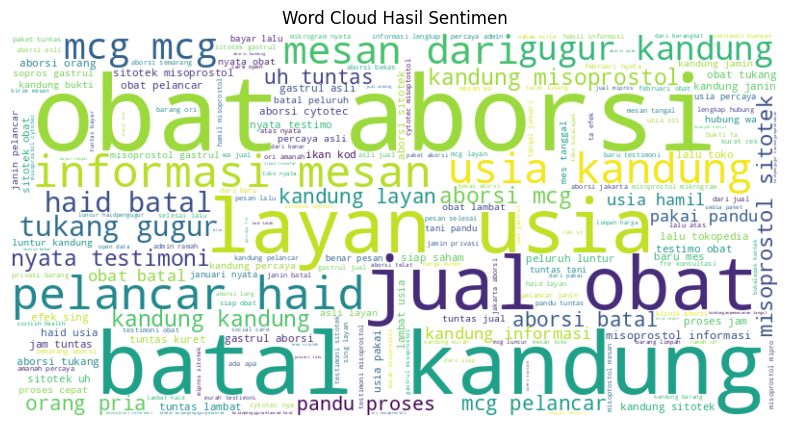

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Mengubah nilai NaN menjadi string kosong pada kolom "processed_text"
df['full_text_stemmer'] = df['full_text_stemmer'].fillna('')

# Menggabungkan semua teks hasil sentimen menjadi satu string
text = ' '.join(df['full_text_stemmer'])

# Membuat WordCloud dari teks
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Memberi judul pada WordCloud
plt.title('Word Cloud Hasil Sentimen')

# Menampilkan plot
plt.show()


In [ ]:

from collections import Counter
# Menghitung Frekuensi Kata
words = text.split()
word_counts = Counter(words)

# Menampilkan WordCount
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')

NameError: name 'text' is not defined

In [ ]:
jumlahusername = df['username'].value_counts()
jumlahusername[:10]

username
obataborsi2018     158
caborsituntas      158
prochoiceID        125
CytotecJ97188       98
JayshiShop77198     96
ObatCytotec07       95
newsjessy686        78
leaaachilia         69
bentt_arfaa         68
rahmani37425895     67
Name: count, dtype: int64

## Forecasting Time Series Based

TODO:
- Bikin 2 var buat nyimpen data processed text!
- format tanggal jadi Y-M-D
- Lihat persebaran penjualan berdasarkan tanggalan, toko, jumlah postingan
- Prediksi penjualan, split 70:30

In [ ]:
import pandas as pd
df = pd.read_csv("/content/processed_text_twitter.csv", delimiter=";")
df

,created_at,Description,username,Item_url
0,Thu Mar 07 01:30:20 +0000 2024,Ready stok 7 maret 2024 Obat aborsi #cytotec_2...,newsjessy686,https://twitter.com/newsjessy686/status/176555...
1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan https://t.co/4wc...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...
2,Wed Mar 06 23:04:53 +0000 2024,"Pesanan hari ini Via Tokopedia Rab,06 Maret 20...",ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...
3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok. Sat set bgt ...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...
4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at 7-9 March! We're cel...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...
...,...,...,...,...
1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...
1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...
1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...
1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...


In [ ]:
from datetime import datetime
def convert_to_datetime(date_str):
    return datetime.strptime(date_str, "%a %b %d %H:%M:%S %z %Y")
df['created_at'] = df['created_at'].apply(convert_to_datetime)
df['formatted_date'] = df['created_at'].dt.strftime("%Y-%m-%d")
df

,created_at,Description,username,Item_url,formatted_date
0,2024-03-07 01:30:20+00:00,Ready stok 7 maret 2024 Obat aborsi #cytotec_2...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,2024-03-07
1,2024-03-07 00:20:53+00:00,Jual Obat Penggugur Kandungan https://t.co/4wc...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,2024-03-07
2,2024-03-06 23:04:53+00:00,"Pesanan hari ini Via Tokopedia Rab,06 Maret 20...",ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,2024-03-06
3,2024-03-06 18:45:56+00:00,Konsultasi sm Mbak cepet aja kok. Sat set bgt ...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,2024-03-06
4,2024-03-06 18:37:09+00:00,Get special price only at 7-9 March! We're cel...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,2024-03-06
...,...,...,...,...,...
1836,2024-05-13 15:33:21+00:00,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,2024-05-13
1837,2024-05-13 15:29:25+00:00,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,2024-05-13
1838,2024-05-31 16:53:31+00:00,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,2024-05-31
1839,2024-05-31 08:55:25+00:00,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...,2024-05-31


In [ ]:
df = df.drop_duplicates(subset='Item_url')
df

,created_at,Description,username,Item_url,formatted_date
0,2024-03-07 01:30:20+00:00,Ready stok 7 maret 2024 Obat aborsi #cytotec_2...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,2024-03-07
1,2024-03-07 00:20:53+00:00,Jual Obat Penggugur Kandungan https://t.co/4wc...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,2024-03-07
2,2024-03-06 23:04:53+00:00,"Pesanan hari ini Via Tokopedia Rab,06 Maret 20...",ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,2024-03-06
3,2024-03-06 18:45:56+00:00,Konsultasi sm Mbak cepet aja kok. Sat set bgt ...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,2024-03-06
4,2024-03-06 18:37:09+00:00,Get special price only at 7-9 March! We're cel...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,2024-03-06
...,...,...,...,...,...
1836,2024-05-13 15:33:21+00:00,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,2024-05-13
1837,2024-05-13 15:29:25+00:00,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,2024-05-13
1838,2024-05-31 16:53:31+00:00,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,2024-05-31
1839,2024-05-31 08:55:25+00:00,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...,2024-05-31


In [ ]:
import matplotlib.pyplot as plt

# Buat plot
plt.figure(figsize=(10, 6))

# Loop melalui setiap tahun
for year in sales_per_year_per_user['year'].unique():
    # Filter data untuk tahun tertentu
    data_year = sales_per_year_per_user[sales_per_year_per_user['year'] == year]

    # Buat plot bar untuk setiap username
    plt.bar(data_year['username'], data_year['transactions'], label=str(year))

# Tambahkan label dan judul
plt.xlabel('Username')
plt.ylabel('Jumlah Transaksi')
plt.title('Persebaran Penjualan Berdasarkan Tahun dan Username')
plt.xticks(rotation=45)
plt.legend(title='Tahun')

# Tampilkan plot
plt.tight_layout()
plt.show()

NameError: name 'sales_per_year_per_user' is not defined

<Figure size 1000x600 with 0 Axes>

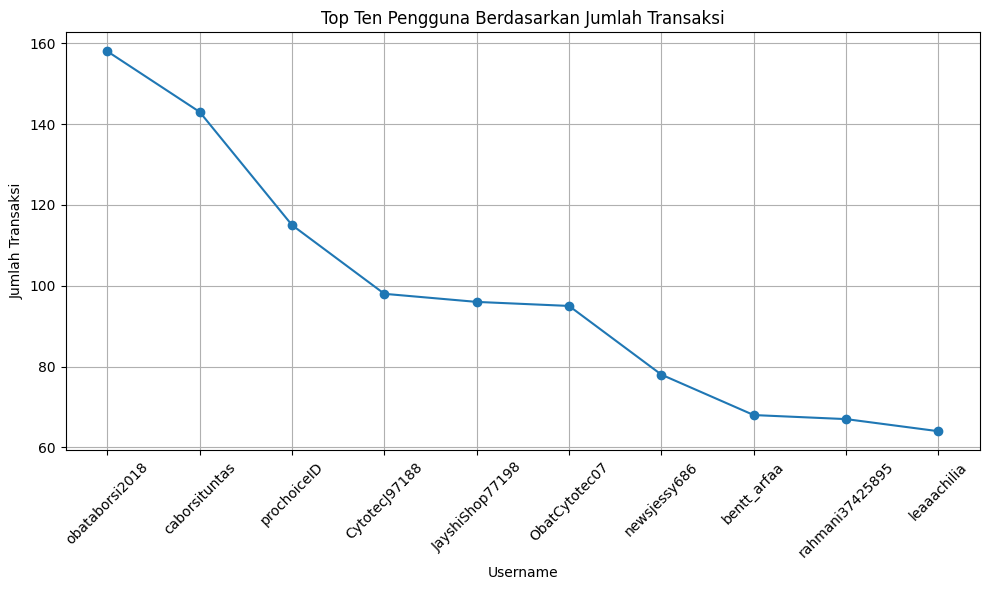

In [ ]:
import matplotlib.pyplot as plt

# Kelompokkan data berdasarkan username dan hitung total transaksi untuk setiap pengguna
user_transactions = df.groupby('username').size()

# Urutkan data berdasarkan total transaksi secara turun
user_transactions_sorted = user_transactions.sort_values(ascending=False)

# Pilih sepuluh pengguna teratas
top_ten_users = user_transactions_sorted.head(10)

# Buat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(top_ten_users.index, top_ten_users.values, marker='o', linestyle='-')

# Tambahkan label dan judul
plt.xlabel('Username')
plt.ylabel('Jumlah Transaksi')
plt.title('Top Ten Pengguna Berdasarkan Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()


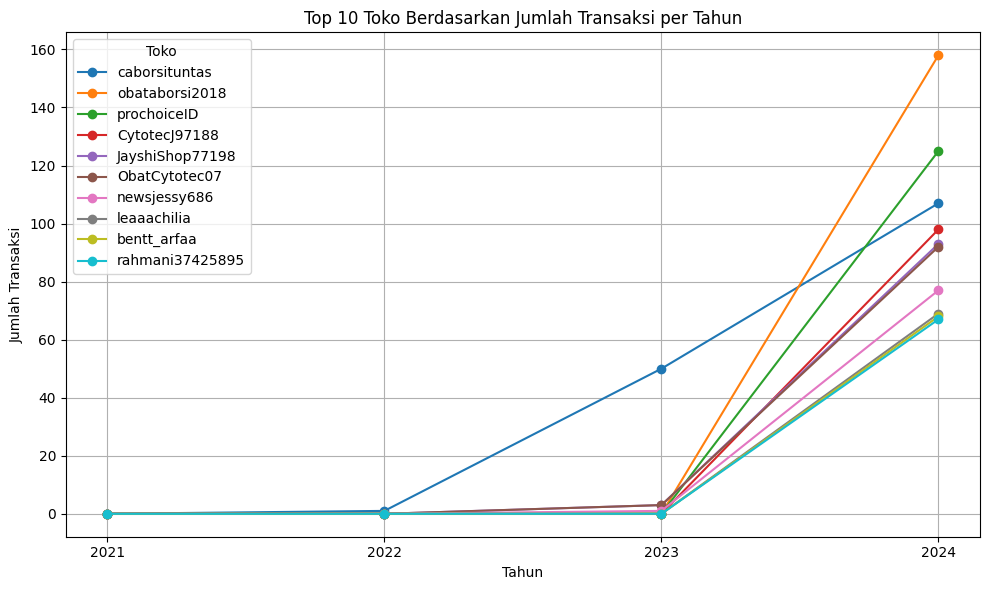

In [ ]:
import matplotlib.pyplot as plt

# Kelompokkan data berdasarkan toko dan tahun, dan hitung total transaksi untuk setiap toko dalam setiap tahun
store_transactions = df.groupby(['username', df['created_at'].dt.year]).size().unstack(fill_value=0)

# Hitung total transaksi untuk setiap toko dalam seluruh tahun
store_total_transactions = store_transactions.sum(axis=1)

# Urutkan toko berdasarkan total transaksi secara turun dan pilih sepuluh toko teratas
top_ten_stores = store_total_transactions.sort_values(ascending=False).head(10)

# Filter data transaksi untuk sepuluh toko teratas
top_ten_store_transactions = store_transactions.loc[top_ten_stores.index]

# Buat grafik garis
plt.figure(figsize=(10, 6))

# Loop melalui setiap toko
for store in top_ten_store_transactions.index:
    # Ambil data transaksi untuk toko tertentu
    data_store = top_ten_store_transactions.loc[store]

    # Buat plot garis untuk setiap toko
    plt.plot(data_store.index, data_store.values, marker='o', label=store)

# Tambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.title('Top 10 Toko Berdasarkan Jumlah Transaksi per Tahun')
plt.xticks(store_transactions.columns)
plt.legend(title='Toko')
plt.grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
df.sort_values(by='formatted_date', ascending=True, inplace=True)
df

<ipython-input-50-6694faa93301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='formatted_date', ascending=True, inplace=True)


,created_at,Description,username,Item_url,formatted_date
1714,2021-01-09 04:58:08+00:00,Jual obat penggugur misoprostol asli masih di ...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09
1715,2021-01-09 04:50:28+00:00,Jual obat terlambat bulan misoprostol asli. Ob...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09
1719,2021-01-09 04:53:25+00:00,Jual obat telat haid misoprostol asli. Obat ma...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09
1739,2021-02-02 05:37:13+00:00,3 Obat penggugur kandungan Cytotec misoprostol...,cytotec200mc,https://twitter.com/cytotec200mc/status/135647...,2021-02-02
1736,2021-02-07 16:24:13+00:00,@alelis_lelis Ready Stock Obat Aborsi Cytotec ...,farmasi_klinik,https://twitter.com/farmasi_klinik/status/1358...,2021-02-07
...,...,...,...,...,...
1821,2024-06-10 14:41:56+00:00,yang nyari obat cytotec misoprostol bisa langs...,xyzQuag,https://x.com/xyzQuag/status/1800176579584409833,2024-06-10
1768,2024-06-10 17:13:04+00:00,Jual Obat Aborsi Penggugur Kandungan Cytotec M...,ObatPenggugur09,https://x.com/ObatPenggugur09/status/180021460...,2024-06-10
1767,2024-06-11 01:36:46+00:00,Ready obat penggugur kandungan Di pandu sampe ...,OBATPENGGUGUUR,https://x.com/OBATPENGGUGUUR/status/1800341372...,2024-06-11
1770,2024-06-11 01:36:27+00:00,Ready obat penggugur kandungan Di pandu sampe ...,Liza78648796,https://x.com/Liza78648796/status/180034129447...,2024-06-11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 1714 to 1782
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      1839 non-null   datetime64[ns, UTC]
 1   Description     1839 non-null   object             
 2   username        1839 non-null   object             
 3   Item_url        1839 non-null   object             
 4   formatted_date  1839 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 150.7+ KB


In [ ]:
df['formatted_date'] = pd.to_datetime(df['formatted_date'])

<ipython-input-52-97ae2abaac72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['formatted_date'] = pd.to_datetime(df['formatted_date'])


<ipython-input-66-814d40b11a53>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10username.values, y=top10username.index, palette='viridis')


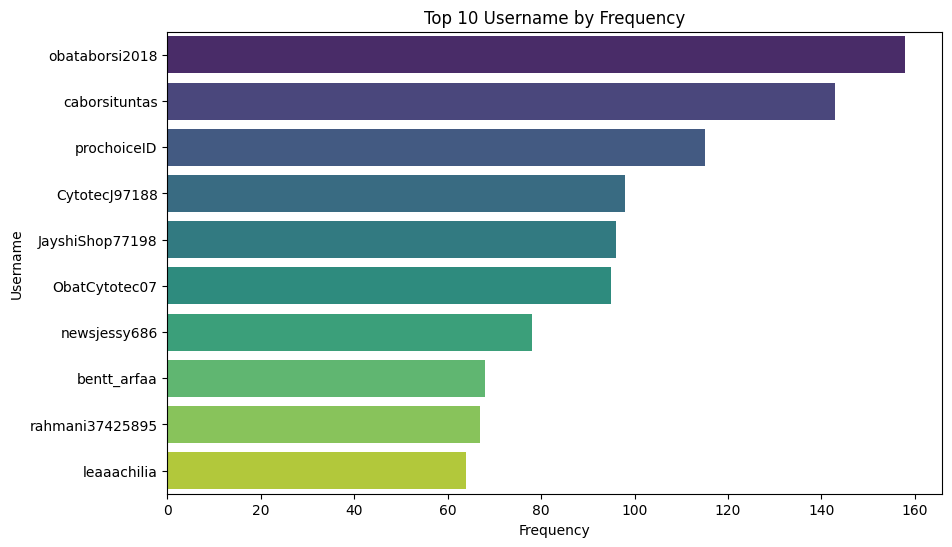

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top10username = jumlahusername[:10]
# Plot grafik batang dengan seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=top10username.values, y=top10username.index, palette='viridis')
plt.title('Top 10 Username by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Username')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 1714 to 1782
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      1839 non-null   datetime64[ns, UTC]
 1   Description     1839 non-null   object             
 2   username        1839 non-null   object             
 3   Item_url        1839 non-null   object             
 4   formatted_date  1839 non-null   datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), object(3)
memory usage: 150.7+ KB


In [ ]:
df['formatted_date'].dt.year.value_counts()

formatted_date
2024    1449
2023     320
2021      46
2022      24
Name: count, dtype: int64

In [ ]:
#df_filtered = df[~df['formatted_date'].dt.year.isin([2021, 2022])]

In [ ]:
#df_filtered

,created_at,Description,username,Item_url,processed_text,formatted_date
1322,2023-05-09 06:19:11+00:00,9 Mei 2023 Jual Cytotec | Jual Gastrul | Jual...,Dindini64359038,https://twitter.com/Dindini64359038/status/165...,9 mei 2023 jual cytotec jual gastrul jual mipr...,2023-05-09
1325,2023-05-09 06:17:26+00:00,9 Mei 2023 Jual Cytotec | Jual Gastrul | Jual...,jualcytotec_cod,https://twitter.com/jualcytotec_cod/status/165...,9 mei 2023 jual cytotec jual gastrul jual mipr...,2023-05-09
1324,2023-05-09 06:17:34+00:00,9 Mei 2023 Jual Cytotec | Jual Gastrul | Jual...,jualcytotec_cod,https://twitter.com/jualcytotec_cod/status/165...,9 mei 2023 jual cytotec jual gastrul jual mipr...,2023-05-09
1323,2023-05-09 06:18:28+00:00,9 Mei 2023 Jual Cytotec | Jual Gastrul | Jual...,Dindini64359038,https://twitter.com/Dindini64359038/status/165...,9 mei 2023 jual cytotec jual gastrul jual mipr...,2023-05-09
1321,2023-05-11 12:29:04+00:00,Update testimoni Misoprostol Mipros !! 10_Mei_...,caborsituntas,https://twitter.com/caborsituntas/status/16566...,update testimoni misoprostol mipros 10mei2023 ...,2023-05-11
...,...,...,...,...,...,...
25,2024-03-06 01:31:00+00:00,It was creepy to see the news lately about Alm...,prochoiceID,https://twitter.com/prochoiceID/status/1765188...,it was creepy to see the news lately about alm...,2024-03-06
24,2024-03-06 01:31:17+00:00,Kehamilan tidak direncanakan bisa dialami siap...,prochoiceID,https://twitter.com/prochoiceID/status/1765188...,hamil rencana alami menjudge apa pilih perempu...,2024-03-06
1326,2024-03-06 00:02:00+00:00,Klinik Aborsi Jakarta Menyediakan Layanan Abor...,klinikaborsi__,https://twitter.com/klinikaborsi__/status/1765...,klinik aborsi jakarta sedia layan aborsi aman ...,2024-03-06
1,2024-03-07 00:20:53+00:00,Jual Obat Penggugur Kandungan https://t.co/4wc...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,jual obat gugur kandung obat aborsi cytotec 1 ...,2024-03-07


In [ ]:
import pandas as pd

In [ ]:
df.shape

(1839, 5)

# EXTRACT NO WA!!!


In [ ]:
def extract_whatsapp_number(text):
    # Pola regex untuk nomor telepon Indonesia (dengan spasi, tanda hubung, atau tanpa pemisah)
    pattern = re.compile(r'(\+62|62|0)?\s?8[1-9][0-9]{1,2}[\s\-]?[0-9]{3,4}[\s\-]?[0-9]{3,4}')
    match = pattern.search(text)
    if match:
        return match.group().replace(' ', '').replace('-', '')  # Menghapus spasi dan tanda hubung
    return None

# Terapkan fungsi ke kolom tweet_text
df['whatsapp_number'] = df['Description'].apply(extract_whatsapp_number)
df

<ipython-input-56-a252cf42107c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whatsapp_number'] = df['Description'].apply(extract_whatsapp_number)


,created_at,Description,username,Item_url,formatted_date,whatsapp_number
1714,2021-01-09 04:58:08+00:00,Jual obat penggugur misoprostol asli masih di ...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09,081275266484
1715,2021-01-09 04:50:28+00:00,Jual obat terlambat bulan misoprostol asli. Ob...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09,081275266484
1719,2021-01-09 04:53:25+00:00,Jual obat telat haid misoprostol asli. Obat ma...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09,081275266484
1739,2021-02-02 05:37:13+00:00,3 Obat penggugur kandungan Cytotec misoprostol...,cytotec200mc,https://twitter.com/cytotec200mc/status/135647...,2021-02-02,081310227299
1736,2021-02-07 16:24:13+00:00,@alelis_lelis Ready Stock Obat Aborsi Cytotec ...,farmasi_klinik,https://twitter.com/farmasi_klinik/status/1358...,2021-02-07,None
...,...,...,...,...,...,...
1821,2024-06-10 14:41:56+00:00,yang nyari obat cytotec misoprostol bisa langs...,xyzQuag,https://x.com/xyzQuag/status/1800176579584409833,2024-06-10,None
1768,2024-06-10 17:13:04+00:00,Jual Obat Aborsi Penggugur Kandungan Cytotec M...,ObatPenggugur09,https://x.com/ObatPenggugur09/status/180021460...,2024-06-10,None
1767,2024-06-11 01:36:46+00:00,Ready obat penggugur kandungan Di pandu sampe ...,OBATPENGGUGUUR,https://x.com/OBATPENGGUGUUR/status/1800341372...,2024-06-11,None
1770,2024-06-11 01:36:27+00:00,Ready obat penggugur kandungan Di pandu sampe ...,Liza78648796,https://x.com/Liza78648796/status/180034129447...,2024-06-11,None


In [ ]:
df['whatsapp_number'].count()

762

In [ ]:
df = df.drop_duplicates(subset="whatsapp_number")
df

,created_at,Description,username,Item_url,formatted_date,whatsapp_number
1714,2021-01-09 04:58:08+00:00,Jual obat penggugur misoprostol asli masih di ...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09,081275266484
1739,2021-02-02 05:37:13+00:00,3 Obat penggugur kandungan Cytotec misoprostol...,cytotec200mc,https://twitter.com/cytotec200mc/status/135647...,2021-02-02,081310227299
1736,2021-02-07 16:24:13+00:00,@alelis_lelis Ready Stock Obat Aborsi Cytotec ...,farmasi_klinik,https://twitter.com/farmasi_klinik/status/1358...,2021-02-07,None
1718,2021-02-17 12:45:41+00:00,Transaksi tanggal 17 februari 2021. Kami menju...,Sema4Obat,https://twitter.com/Sema4Obat/status/136202039...,2021-02-17,081275267484
1735,2021-05-14 07:56:01+00:00,Jual obat aborsi misoprostol asli ampuh garans...,obataborsioke,https://twitter.com/obataborsioke/status/13931...,2021-05-14,081358852990
1733,2021-07-09 02:48:01+00:00,085870181815 Cara Menunda/Mencegah Kehamilan D...,sekolahibuhamil,https://twitter.com/sekolahibuhamil/status/141...,2021-07-09,085870181815
1731,2021-07-28 04:49:31+00:00,Jual obat aborsi di apotik obat cytotec misopr...,obat_aborsi_di,https://twitter.com/obat_aborsi_di/status/1420...,2021-07-28,082138183425
1741,2021-08-01 17:55:10+00:00,Obat Cytotec Misoprostol Obat Penggugur Kandun...,Inipria1,https://twitter.com/Inipria1/status/1421892276...,2021-08-01,085707996215
1734,2021-08-06 17:31:48+00:00,Tlp: 085640337798 Whatsapp 0816685289 https://...,farmasi_klinik,https://twitter.com/farmasi_klinik/status/1423...,2021-08-06,085640337798
1743,2021-09-25 16:16:23+00:00,Apotek Menyediakan Obat Cytotec Misoprostol Wa...,tokosarihusada,https://twitter.com/tokosarihusada/status/1441...,2021-09-25,081222292216


In [ ]:
df['whatsapp_number'].count()

57

In [ ]:
df.isna().count()

created_at         58
Description        58
username           58
Item_url           58
formatted_date     58
whatsapp_number    58
dtype: int64

In [ ]:
df.dropna(subset='whatsapp_number')

,created_at,Description,username,Item_url,formatted_date,whatsapp_number
1714,2021-01-09 04:58:08+00:00,Jual obat penggugur misoprostol asli masih di ...,OBATABORSIMISO2,https://twitter.com/OBATABORSIMISO2/status/134...,2021-01-09,081275266484
1739,2021-02-02 05:37:13+00:00,3 Obat penggugur kandungan Cytotec misoprostol...,cytotec200mc,https://twitter.com/cytotec200mc/status/135647...,2021-02-02,081310227299
1718,2021-02-17 12:45:41+00:00,Transaksi tanggal 17 februari 2021. Kami menju...,Sema4Obat,https://twitter.com/Sema4Obat/status/136202039...,2021-02-17,081275267484
1735,2021-05-14 07:56:01+00:00,Jual obat aborsi misoprostol asli ampuh garans...,obataborsioke,https://twitter.com/obataborsioke/status/13931...,2021-05-14,081358852990
1733,2021-07-09 02:48:01+00:00,085870181815 Cara Menunda/Mencegah Kehamilan D...,sekolahibuhamil,https://twitter.com/sekolahibuhamil/status/141...,2021-07-09,085870181815
1731,2021-07-28 04:49:31+00:00,Jual obat aborsi di apotik obat cytotec misopr...,obat_aborsi_di,https://twitter.com/obat_aborsi_di/status/1420...,2021-07-28,082138183425
1741,2021-08-01 17:55:10+00:00,Obat Cytotec Misoprostol Obat Penggugur Kandun...,Inipria1,https://twitter.com/Inipria1/status/1421892276...,2021-08-01,085707996215
1734,2021-08-06 17:31:48+00:00,Tlp: 085640337798 Whatsapp 0816685289 https://...,farmasi_klinik,https://twitter.com/farmasi_klinik/status/1423...,2021-08-06,085640337798
1743,2021-09-25 16:16:23+00:00,Apotek Menyediakan Obat Cytotec Misoprostol Wa...,tokosarihusada,https://twitter.com/tokosarihusada/status/1441...,2021-09-25,081222292216
1729,2021-11-18 05:29:29+00:00,Jual obat aborsi penggugur janin ampuh. Cytote...,obataborsibatam,https://twitter.com/obataborsibatam/status/146...,2021-11-18,085779933826


In [ ]:
df.count()

created_at         58
Description        58
username           58
Item_url           58
formatted_date     58
whatsapp_number    57
dtype: int64

In [ ]:
df.to_csv('[WhatsApp Number] Misoprostol Twitter Seller.csv', index=False)

In [ ]:
df

NameError: name 'df' is not defined

# CLUSTERING

In [ ]:
import pandas as pd

In [ ]:
dc = pd.read_csv("/content/forclusteringmisoprostol.csv", sep=";")
dc

,Item URL,Description,Location,Store,Platform
0,https://www.facebook.com/marketplace/item/1134...,Cytotek,KOTA SURABAYA,User Facebook,Facebook
1,https://www.facebook.com/marketplace/item/1842...,obat pe.ng.gu.gur kan.dungam kehamilan ampuH,KOTA SURABAYA,User Facebook,Facebook
2,https://www.facebook.com/marketplace/item/7431...,Cytotek,KABUPATEN GRESIK,User Facebook,Facebook
3,https://www.facebook.com/marketplace/item/6500...,Jual obat A.bor_/si - cara A.bor_/si cara meng...,KOTA SURABAYA,User Facebook,Facebook
4,https://www.facebook.com/marketplace/item/2451...,OBAT PENGGUGUR KANDUNGAN KEHAM.ILAN TU.NTAS AS.LI,KOTA SURABAYA,User Facebook,Facebook
...,...,...,...,...,...
234,https://x.com/JayshiShop/status/18001413502913...,Real testimo obat aborsi Senin 10 JUNI 2024 Re...,KOTA JAKARTA PUSAT,JayshiShop,Twitter
235,https://x.com/JayshiShop/status/17987573714745...,Real testimo obat aborsi Kamis 6 JUNI 2024 Rea...,KOTA JAKARTA PUSAT,JayshiShop,Twitter
236,https://x.com/JayshiShop/status/18001411021562...,Real testimo obat aborsi Senin 10 JUNI 2024 Re...,KOTA JAKARTA PUSAT,JayshiShop,Twitter
237,https://x.com/JayshiShop/status/17995659840278...,Stok cytotec misoprostol Minggu 9 JUNI 2024 Re...,KOTA JAKARTA PUSAT,JayshiShop,Twitter


In [ ]:
dc['Location'] = dc['Location'].str.strip()
dc['Location'] = dc['Location'].str.upper()

area = dc['Location'].value_counts()
area.head()

Location
KOTA SURABAYA         29
KOTA JAKARTA PUSAT    27
KOTA DENPASAR         23
KABUPATEN PATI        15
KOTA MALANG           10
Name: count, dtype: int64

In [ ]:
dfarea= pd.DataFrame(area).reset_index()

# Beri nama kolom pada DataFrame baru
dfarea.columns = ['Location', 'Count']
dfarea.head()

,Location,Count
0,KOTA SURABAYA,29
1,KOTA JAKARTA PUSAT,27
2,KOTA DENPASAR,23
3,KABUPATEN PATI,15
4,KOTA MALANG,10


In [ ]:
dfarea = pd.merge(dfarea, dc[['Location', 'Store']], on='Location', how='left')

dfarea.head()

,Location,Count,Store
0,KOTA SURABAYA,29,User Facebook
1,KOTA SURABAYA,29,User Facebook
2,KOTA SURABAYA,29,User Facebook
3,KOTA SURABAYA,29,User Facebook
4,KOTA SURABAYA,29,User Facebook


In [ ]:
df_kabupaten = pd.read_csv('kabupaten.csv')
df_kabupaten

,code,parent_code,Location
0,1101,11,KABUPATEN SIMEULUE
1,1102,11,KABUPATEN ACEH SINGKIL
2,1103,11,KABUPATEN ACEH SELATAN
3,1104,11,KABUPATEN ACEH TENGGARA
4,1105,11,KABUPATEN ACEH TIMUR
...,...,...,...
509,9433,94,KABUPATEN PUNCAK
510,9434,94,KABUPATEN DOGIYAI
511,9435,94,KABUPATEN INTAN JAYA
512,9436,94,KABUPATEN DEIYAI


In [ ]:
df_kabupaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         514 non-null    int64 
 1   parent_code  514 non-null    int64 
 2   Location     514 non-null    object
dtypes: int64(2), object(1)
memory usage: 12.2+ KB


In [ ]:
dfareaid= pd.merge(dfarea, df_kabupaten, on="Location")
dfareaid.drop(columns='code', inplace=True)
dfareaid.head()

,Location,Count,Store,parent_code
0,KOTA SURABAYA,29,User Facebook,35
1,KOTA SURABAYA,29,User Facebook,35
2,KOTA SURABAYA,29,User Facebook,35
3,KOTA SURABAYA,29,User Facebook,35
4,KOTA SURABAYA,29,User Facebook,35


In [ ]:
dfareaid = dfareaid.rename(columns={'Location':'Kabupaten', 'Count':'Total', 'parent_code':'code'})

In [ ]:
dfprov= pd.read_csv("provinsi.csv", sep=";")
dfprov.head()

,code,parent_code,name,Latitude,Longitude
0,11,0,ACEH,4.040507e+13,96649002928244
1,12,0,SUMATERA UTARA,1.831366e+13,98742431763566
2,13,0,SUMATERA BARAT,-1.554442e+13,10024479865029
3,14,0,RIAU,8.984276e-01,10191972988343
4,15,0,JAMBI,-1.751681e+13,10281327938858


In [ ]:
dfprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         34 non-null     int64  
 1   parent_code  34 non-null     int64  
 2   name         34 non-null     object 
 3   Latitude     34 non-null     float64
 4   Longitude    34 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [ ]:
dfprov['Longitude'] = dfprov['Longitude'].astype('float64')

In [ ]:
dfprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         34 non-null     int64  
 1   parent_code  34 non-null     int64  
 2   name         34 non-null     object 
 3   Latitude     34 non-null     float64
 4   Longitude    34 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
dfareaid= pd.merge(dfareaid, dfprov, on="code")
dfareaid.drop(columns='parent_code', inplace=True)
dfareaid

,Kabupaten,Total,Store,code,name,Latitude,Longitude
0,KOTA SURABAYA,29,User Facebook,35,JAWA TIMUR,-6.914609e+13,1.135845e+11
1,KOTA SURABAYA,29,User Facebook,35,JAWA TIMUR,-6.914609e+13,1.135845e+11
2,KOTA SURABAYA,29,User Facebook,35,JAWA TIMUR,-6.914609e+13,1.135845e+11
3,KOTA SURABAYA,29,User Facebook,35,JAWA TIMUR,-6.914609e+13,1.135845e+11
4,KOTA SURABAYA,29,User Facebook,35,JAWA TIMUR,-6.914609e+13,1.135845e+11
...,...,...,...,...,...,...,...
228,KOTA BANJARMASIN,4,User Facebook,63,KALIMANTAN SELATAN,-3.029926e+13,1.154528e+13
229,KOTA MATARAM,2,User Facebook,52,NUSA TENGGARA BARAT,-8.594855e+13,1.175784e+13
230,KOTA MATARAM,2,User Facebook,52,NUSA TENGGARA BARAT,-8.594855e+13,1.175784e+13
231,KABUPATEN LOMBOK TENGAH,1,User Facebook,52,NUSA TENGGARA BARAT,-8.594855e+13,1.175784e+13


In [ ]:
dfareaid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kabupaten  233 non-null    object 
 1   Total      233 non-null    int64  
 2   Store      233 non-null    object 
 3   code       233 non-null    int64  
 4   name       233 non-null    object 
 5   Latitude   233 non-null    float64
 6   Longitude  233 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.9+ KB


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Load the dataset
df = dfareaid
# Create a scattergeo map
fig = go.Figure(data=go.Scattergeo(
    lat=df['Latitude'],
    lon=df['Longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Total'], # Color by total drug sales
        colorscale='Reds',
        showscale=True,
        colorbar=dict(title='Total Drug Sales')
    ),
    text=df['name'], # Province names
    hovertemplate="<b>%{text}</b><br>Total Drug Sales: %{marker.color}<br><extra></extra>",
))

# Update the layout
fig.update_layout(
    title_text = 'Illegal Drug Selling in Indonesia by Province',
    geo = dict(
        scope='asia', # Limit map scope to Asia
        projection_type='mercator', # Mercator projection
        showland = True, # Show land areas
        landcolor = 'rgb(217, 217, 217)', # Land color
        countrycolor = 'rgb(204, 204, 204)', # Country border color
    ),
)

# Show the figure
fig.show()

In [ ]:
dfareaid.to_csv('dfareaid', index=False)

## K-MEANS

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from hdbscan import HDBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
scaler = StandardScaler()
jumlah_terjual_scaled = scaler.fit_transform(dfareaid[['Total']])

In [ ]:
scaler = MinMaxScaler()
dfareaid['Total_Normalized'] = scaler.fit_transform(dfareaid[['Total']])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Anda bisa mengubah jumlah cluster sesuai kebutuhan
dfareaid['Cluster'] = kmeans.fit_predict(dfareaid[['Total_Normalized']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dfareaid

,Kabupaten,Total,code,name,Latitude,Longitude,Total_Normalized,Cluster,dbscan_cluster,hdbscan_cluster
0,KOTA SURABAYA,29,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,1.000000,1,-1,-1
1,KOTA MALANG,10,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.321429,2,0,-1
2,KOTA KEDIRI,7,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.214286,2,0,-1
3,KABUPATEN SIDOARJO,6,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.178571,2,0,-1
4,KABUPATEN TUBAN,5,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.142857,0,0,0
5,KABUPATEN JOMBANG,4,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.107143,0,0,-1
6,KOTA BLITAR,3,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.071429,0,0,0
7,KABUPATEN PASURUAN,2,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.035714,0,0,1
8,KABUPATEN BANGKALAN,2,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.035714,0,0,1
9,KABUPATEN BOJONEGORO,2,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335,0.035714,0,0,1


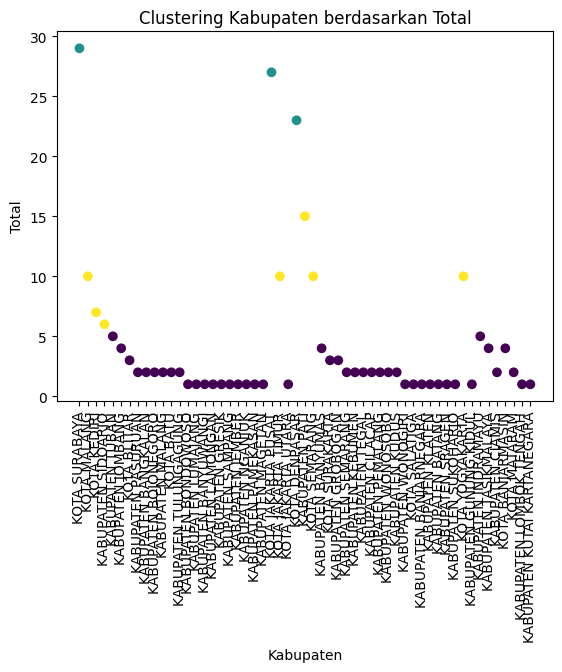

In [ ]:
plt.scatter(dfareaid['Kabupaten'], dfareaid['Total'], c=dfareaid['Cluster'], cmap='viridis')
plt.xlabel('Kabupaten')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.title('Clustering Kabupaten berdasarkan Total')
plt.show()

In [ ]:
scaler = StandardScaler()
numerical_columns = ['Total']
df_normalized = dfareaid.copy()  # Salin dataset asli ke dataset baru
df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

# Menyimpan dataset baru setelah normalisasi
df_normalized.to_csv('df_normalized.csv', index=False)
print("Statistik Ringkasan Dataset Setelah Normalisasi:")
df_normalized

Statistik Ringkasan Dataset Setelah Normalisasi:


,Kabupaten,Total,code,name,Latitude,Longitude
0,KOTA SURABAYA,4.062216,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
1,KOTA MALANG,0.945464,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
2,KOTA KEDIRI,0.453346,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
3,KABUPATEN SIDOARJO,0.289306,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
4,KABUPATEN TUBAN,0.125267,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
5,KABUPATEN JOMBANG,-0.038773,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
6,KOTA BLITAR,-0.202813,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
7,KABUPATEN PASURUAN,-0.366852,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
8,KABUPATEN BANGKALAN,-0.366852,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335
9,KABUPATEN BOJONEGORO,-0.366852,35,JAWA TIMUR,-69.146.085.680.302,113.584.454.335


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
dfareaid['kmeans_cluster'] = kmeans.fit_predict(jumlah_terjual_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dfareaid['dbscan_cluster'] = dbscan.fit_predict(jumlah_terjual_scaled)

In [ ]:
hdbscan = HDBSCAN(min_cluster_size=5)
dfareaid['hdbscan_cluster'] = hdbscan.fit_predict(jumlah_terjual_scaled)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Metode KMeans:
Silhouette Score: 0.7906
Davies-Bouldin Index: 0.3110
Calinski-Harabasz Index: 396.6359


Metode DBSCAN menghasilkan hanya satu cluster atau hanya noise.
Metode HDBSCAN:
Silhouette Score: 0.9423
Davies-Bouldin Index: 0.1778
Calinski-Harabasz Index: 361.4634




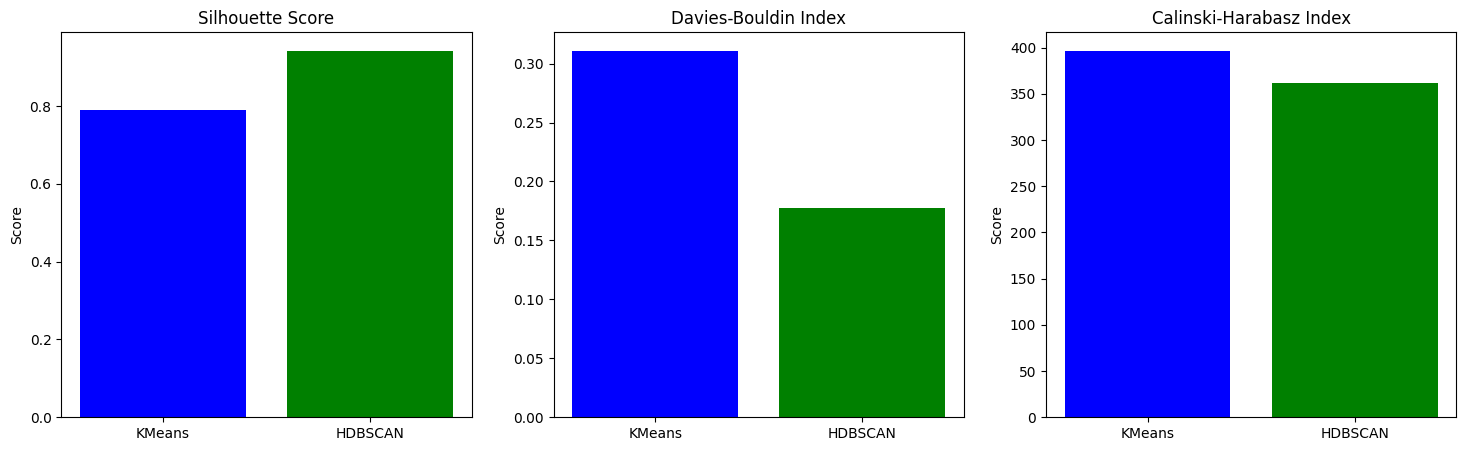

In [ ]:
def evaluate_clustering(data, cluster_labels, method_name):
    n_labels = len(set(cluster_labels))

    if n_labels > 1:
        silhouette_avg = silhouette_score(data, cluster_labels)
        db_score = davies_bouldin_score(data, cluster_labels)
        ch_score = calinski_harabasz_score(data, cluster_labels)

        print(f"Metode {method_name}:")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Davies-Bouldin Index: {db_score:.4f}")
        print(f"Calinski-Harabasz Index: {ch_score:.4f}")
        print("\n")

        return silhouette_avg, db_score, ch_score
    else:
        print(f"Metode {method_name} menghasilkan hanya satu cluster atau hanya noise.")
        return None, None, None

# Mengevaluasi KMeans
kmeans_silhouette, kmeans_db, kmeans_ch = evaluate_clustering(jumlah_terjual_scaled, kmeans.labels_, 'KMeans')

# Mengevaluasi DBSCAN
dbscan_labels = dbscan.labels_
dbscan_silhouette, dbscan_db, dbscan_ch = evaluate_clustering(jumlah_terjual_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1], 'DBSCAN')

# Mengevaluasi HDBSCAN
hdbscan_labels = hdbscan.labels_
hdbscan_silhouette, hdbscan_db, hdbscan_ch = evaluate_clustering(jumlah_terjual_scaled[hdbscan_labels != -1], hdbscan_labels[hdbscan_labels != -1], 'HDBSCAN')

# Membuat Grafik Perbandingan jika ada lebih dari satu cluster valid
methods = ['KMeans', 'DBSCAN', 'HDBSCAN']
silhouette_scores = [kmeans_silhouette, dbscan_silhouette, hdbscan_silhouette]
db_scores = [kmeans_db, dbscan_db, hdbscan_db]
ch_scores = [kmeans_ch, dbscan_ch, hdbscan_ch]

# Filter None values for plotting
valid_methods = [methods[i] for i in range(len(methods)) if silhouette_scores[i] is not None]
valid_silhouette_scores = [score for score in silhouette_scores if score is not None]
valid_db_scores = [score for score in db_scores if score is not None]
valid_ch_scores = [score for score in ch_scores if score is not None]

if valid_methods:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].bar(valid_methods, valid_silhouette_scores, color=['blue', 'green', 'red'])
    axes[0].set_title('Silhouette Score')
    axes[0].set_ylabel('Score')

    axes[1].bar(valid_methods, valid_db_scores, color=['blue', 'green', 'red'])
    axes[1].set_title('Davies-Bouldin Index')
    axes[1].set_ylabel('Score')

    axes[2].bar(valid_methods, valid_ch_scores, color=['blue', 'green', 'red'])
    axes[2].set_title('Calinski-Harabasz Index')
    axes[2].set_ylabel('Score')

    plt.show()
else:
    print("Tidak ada metode yang menghasilkan lebih dari satu cluster valid untuk dibandingkan.")


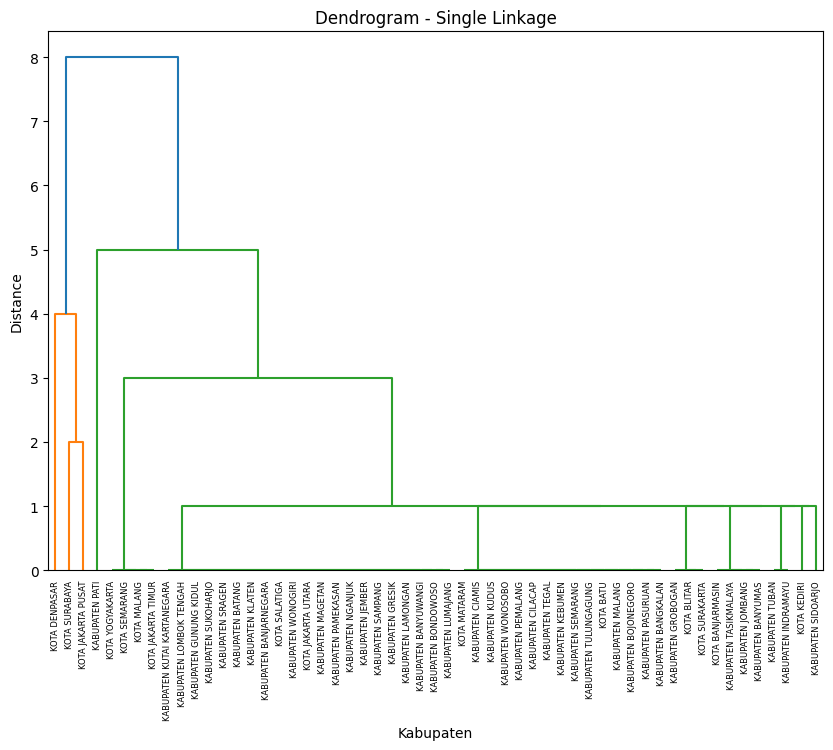

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
X = dfareaid[['Total']].values

# Menggunakan metode single linkage untuk clustering
linkage_matrix = linkage(X, method='single')

# Membuat dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=dfareaid['Kabupaten'].values, leaf_rotation=90)
plt.title("Dendrogram - Single Linkage")
plt.xlabel("Kabupaten")
plt.ylabel("Distance")
plt.show()

Metode Single Linkage:
Silhouette Score: 0.6243
Davies-Bouldin Index: 0.1383
Calinski-Harabasz Index: 105.9930


Metode KMeans:
Silhouette Score: 0.7906
Davies-Bouldin Index: 0.3110
Calinski-Harabasz Index: 396.6359


Metode DBSCAN menghasilkan hanya satu cluster atau hanya noise.
Metode HDBSCAN:
Silhouette Score: 0.9423
Davies-Bouldin Index: 0.1778
Calinski-Harabasz Index: 361.4634




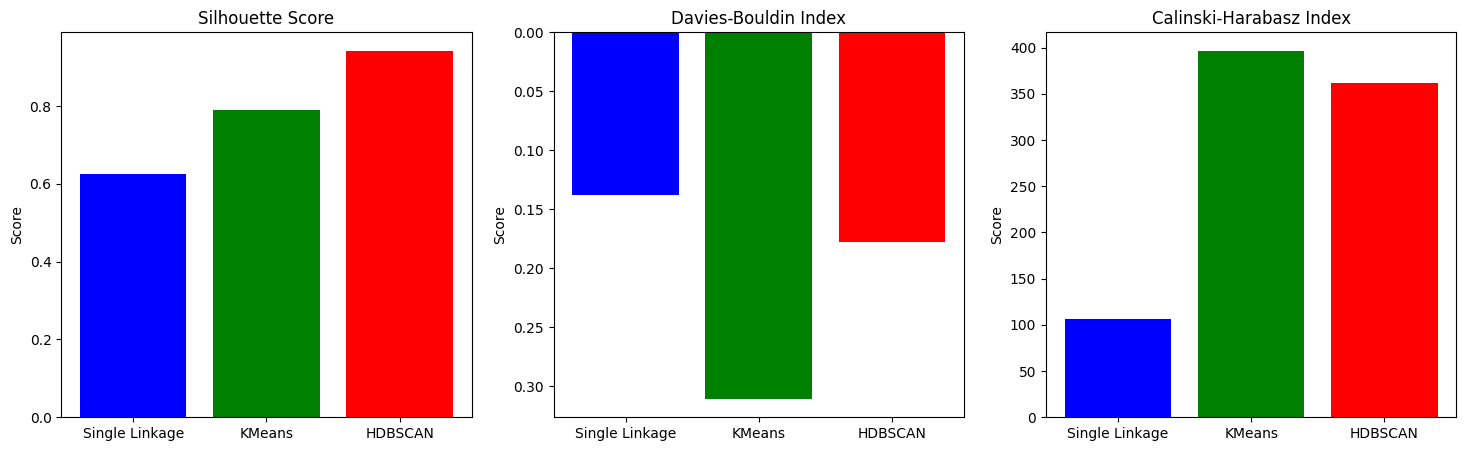

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(data, cluster_labels, method_name):
    n_labels = len(set(cluster_labels))

    if n_labels > 1:
        silhouette_avg = silhouette_score(data, cluster_labels)
        db_score = davies_bouldin_score(data, cluster_labels)
        ch_score = calinski_harabasz_score(data, cluster_labels)

        print(f"Metode {method_name}:")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Davies-Bouldin Index: {db_score:.4f}")
        print(f"Calinski-Harabasz Index: {ch_score:.4f}")
        print("\n")

        return silhouette_avg, db_score, ch_score
    else:
        print(f"Metode {method_name} menghasilkan hanya satu cluster atau hanya noise.")
        return None, None, None

# Contoh data
data = {
    'Kabupaten': ['KOTA SURABAYA', 'KOTA MALANG', 'KOTA KEDIRI', 'KABUPATEN SIDOARJO', 'KABUPATEN TUBAN',
                  'KABUPATEN JOMBANG', 'KOTA BLITAR', 'KABUPATEN PASURUAN', 'KABUPATEN BANGKALAN', 'KABUPATEN BOJONEGORO',
                  'KABUPATEN MALANG', 'KOTA BATU', 'KABUPATEN TULUNGAGUNG', 'KABUPATEN BONDOWOSO', 'KABUPATEN LUMAJANG',
                  'KABUPATEN BANYUWANGI', 'KABUPATEN LAMONGAN', 'KABUPATEN GRESIK', 'KABUPATEN SAMPANG', 'KABUPATEN JEMBER',
                  'KABUPATEN NGANJUK'],
    'Total': [29, 10, 7, 6, 5, 4, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Mengambil kolom 'Total' sebagai basis clustering
X = df[['Total']].values

# Menggunakan metode single linkage untuk clustering
linkage_matrix = linkage(X, method='single')
cluster_labels_single_linkage = fcluster(linkage_matrix, t=1.5, criterion='distance')

# Mengevaluasi Single Linkage
single_linkage_silhouette, single_linkage_db, single_linkage_ch = evaluate_clustering(X, cluster_labels_single_linkage, 'Single Linkage')

# Mengevaluasi KMeans
kmeans_silhouette, kmeans_db, kmeans_ch = evaluate_clustering(jumlah_terjual_scaled, kmeans.labels_, 'KMeans')

# Mengevaluasi DBSCAN
dbscan_labels = dbscan.labels_
dbscan_silhouette, dbscan_db, dbscan_ch = evaluate_clustering(jumlah_terjual_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1], 'DBSCAN')

# Mengevaluasi HDBSCAN
hdbscan_labels = hdbscan.labels_
hdbscan_silhouette, hdbscan_db, hdbscan_ch = evaluate_clustering(jumlah_terjual_scaled[hdbscan_labels != -1], hdbscan_labels[hdbscan_labels != -1], 'HDBSCAN')

# Membuat Grafik Perbandingan jika ada lebih dari satu cluster valid
methods = ['Single Linkage', 'KMeans', 'DBSCAN', 'HDBSCAN']
silhouette_scores = [single_linkage_silhouette, kmeans_silhouette, dbscan_silhouette, hdbscan_silhouette]
db_scores = [single_linkage_db, kmeans_db, dbscan_db, hdbscan_db]
ch_scores = [single_linkage_ch, kmeans_ch, dbscan_ch, hdbscan_ch]

# Filter None values for plotting
valid_methods = [methods[i] for i in range(len(methods)) if silhouette_scores[i] is not None]
valid_silhouette_scores = [score for score in silhouette_scores if score is not None]
valid_db_scores = [score for score in db_scores if score is not None]
valid_ch_scores = [score for score in ch_scores if score is not None]

if valid_methods:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].bar(valid_methods, valid_silhouette_scores, color=['blue', 'green', 'red', 'purple'])
    axes[0].set_title('Silhouette Score')
    axes[0].set_ylabel('Score')

    axes[1].bar(valid_methods, valid_db_scores, color=['blue', 'green', 'red', 'purple'])
    axes[1].set_title('Davies-Bouldin Index')
    axes[1].set_ylabel('Score')
    axes[1].invert_yaxis()  # Davies-Bouldin Index, lower is better

    axes[2].bar(valid_methods, valid_ch_scores, color=['blue', 'green', 'red', 'purple'])
    axes[2].set_title('Calinski-Harabasz Index')
    axes[2].set_ylabel('Score')

    plt.show()
else:
    print("Tidak ada metode yang menghasilkan lebih dari satu cluster valid untuk dibandingkan.")


In [ ]:
dfareaid

# Sentiment Analysis


In [ ]:
import pandas as pd

In [ ]:
dfsa = pd.read_csv("misoprostolbersih.csv")
dfsa.head()

,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...


In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

In [ ]:
dfsa

,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...
...,...,...,...,...,...,...,...,...,...,...
1834,1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...
1835,1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...
1836,1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...
1837,1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol sitoteka misotab sopros ...,jual obat misoprostol sitoteka misotab sopros ...


In [ ]:
unique_types = dfsa['full_text_stemmer'].apply(type).unique()
print(unique_types)


[<class 'str'>]


In [ ]:
dfsa = dfsa[~dfsa['full_text_stemmer'].apply(lambda x: isinstance(x, float))]

In [ ]:
dfsa

,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...
...,...,...,...,...,...,...,...,...,...,...
1834,1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...
1835,1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...
1836,1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...
1837,1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol cytotec misotab sopros g...,leaaachilia,https://x.com/leaaachilia/status/1796465496713...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol cytotec misotab sopros g...,Jual obat misoprostol sitoteka misotab sopros ...,jual obat misoprostol sitoteka misotab sopros ...


In [ ]:
dfsa['prepos_text'] = dfsa.full_text_stemmer.str.split()

<ipython-input-21-c07f536c9787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsa['prepos_text'] = dfsa.full_text_stemmer.str.split()


In [ ]:
# Apply the sentiment analysis function
results = dfsa['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dfsa['polarity_score'] = results[0]
dfsa['polarity'] = results[1]
print(dfsa['polarity'].value_counts())

polarity
negatif    1335
positif     282
netral      218
Name: count, dtype: int64


<ipython-input-23-608e0fdd1c6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsa['polarity_score'] = results[0]
<ipython-input-23-608e0fdd1c6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsa['polarity'] = results[1]


In [ ]:
# Apply the sentiment analysis function
results = dfsa['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dfsa['polarity_score'] = results[0]
dfsa['polarity'] = results[1]
print(dfsa['polarity'].value_counts())

polarity
negatif    1335
positif     282
netral      218
Name: count, dtype: int64


<ipython-input-24-608e0fdd1c6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsa['polarity_score'] = results[0]
<ipython-input-24-608e0fdd1c6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsa['polarity'] = results[1]


In [ ]:
# Apply the sentiment analysis function
results = dfsa['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dfsa['polarity_score'] = results[0]
dfsa['polarity'] = results[1]
print(dfsa['polarity'].value_counts())

polarity
negatif    1335
positif     282
netral      218
Name: count, dtype: int64


In [ ]:
# Apply the sentiment analysis function
results = dfsa['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dfsa['polarity_score'] = results[0]
dfsa['polarity'] = results[1]
print(dfsa['polarity'].value_counts())

polarity
negatif    1335
positif     282
netral      218
Name: count, dtype: int64


In [ ]:
string = "jual obat tukang gugur kandung obat aborsi sitotek murah garansi bangka belitung"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-11, 'negatif')

In [ ]:
dfsa

,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer,prepos_text,polarity_score,polarity
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...,"[siap, saham, maret, obat, aborsi, mcg, amp, m...",-10,negatif
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...,"[jual, obat, tukang, gugur, kandung, kandung, ...",-11,negatif
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...,"[pesan, lalu, tokopedia, rab, maret, nyata, te...",-3,negatif
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...,"[konsultasi, mbak, cepat, duduk, atur, banget,...",-10,negatif
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...,"[dapat, harga, spesial, hanya, di, bulan, mare...",7,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...,"[telat, menstruasi, obrol, nyata, testimoni, a...",5,positif
1835,1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...,"[informasi, aborsi, orang, pria, jual, obat, a...",-6,negatif
1836,1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...,"[temu, obat, misoprostol, misotab, nusoter, si...",-2,negatif
1837,1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol 

In [ ]:
dfsa

,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer,prepos_text,polarity_score,polarity
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...,"[siap, saham, maret, obat, aborsi, mcg, amp, m...",-10,negatif
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...,"[jual, obat, tukang, gugur, kandung, kandung, ...",-11,negatif
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...,"[pesan, lalu, tokopedia, rab, maret, nyata, te...",-3,negatif
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...,"[konsultasi, mbak, cepat, duduk, atur, banget,...",-10,negatif
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...,"[dapat, harga, spesial, hanya, di, bulan, mare...",7,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...,"[telat, menstruasi, obrol, nyata, testimoni, a...",5,positif
1835,1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...,"[informasi, aborsi, orang, pria, jual, obat, a...",-6,negatif
1836,1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...,"[temu, obat, misoprostol, misotab, nusoter, si...",-2,negatif
1837,1839,Fri May 31 08:55:25 +0000 2024,Jual obat misoprostol 

<ipython-input-114-f4827de319c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=dfsa, palette="pastel")


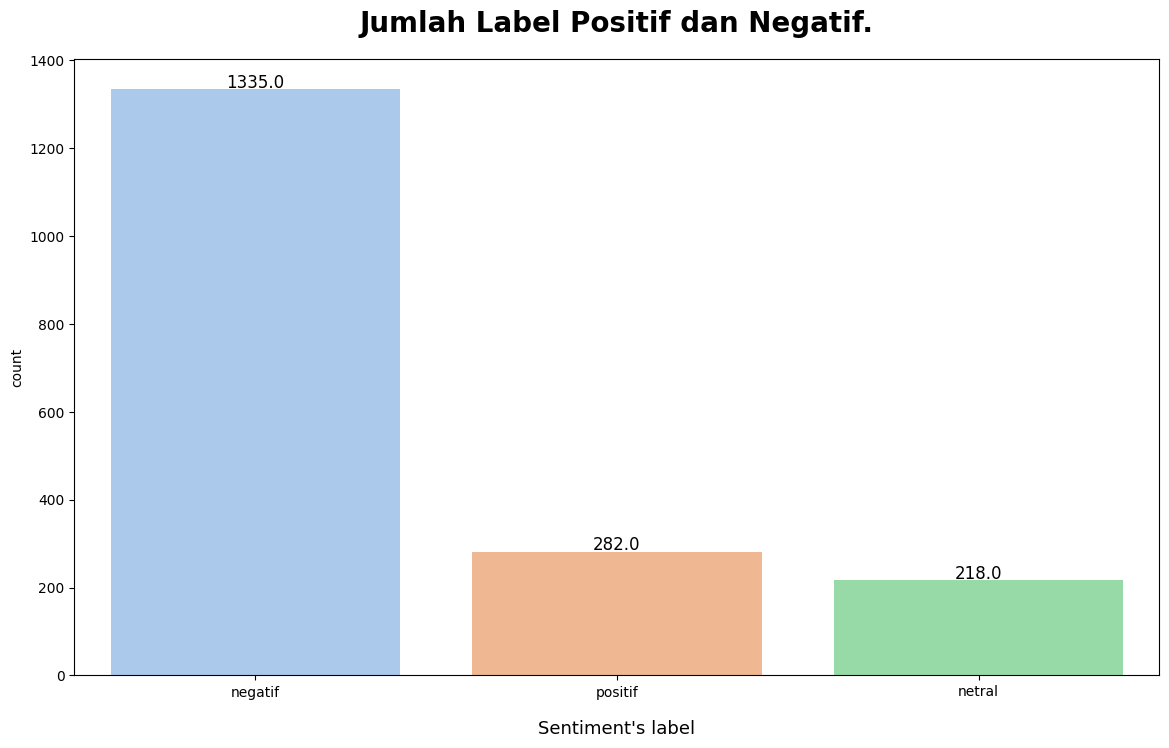

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=dfsa, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

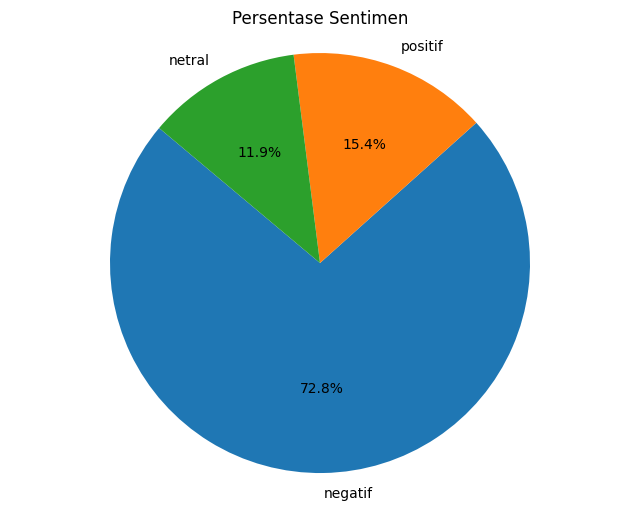

In [ ]:
polarity_counts = dfsa['polarity'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen')
plt.axis('equal')
plt.show()

NameError: name 'polarity_counts' is not defined

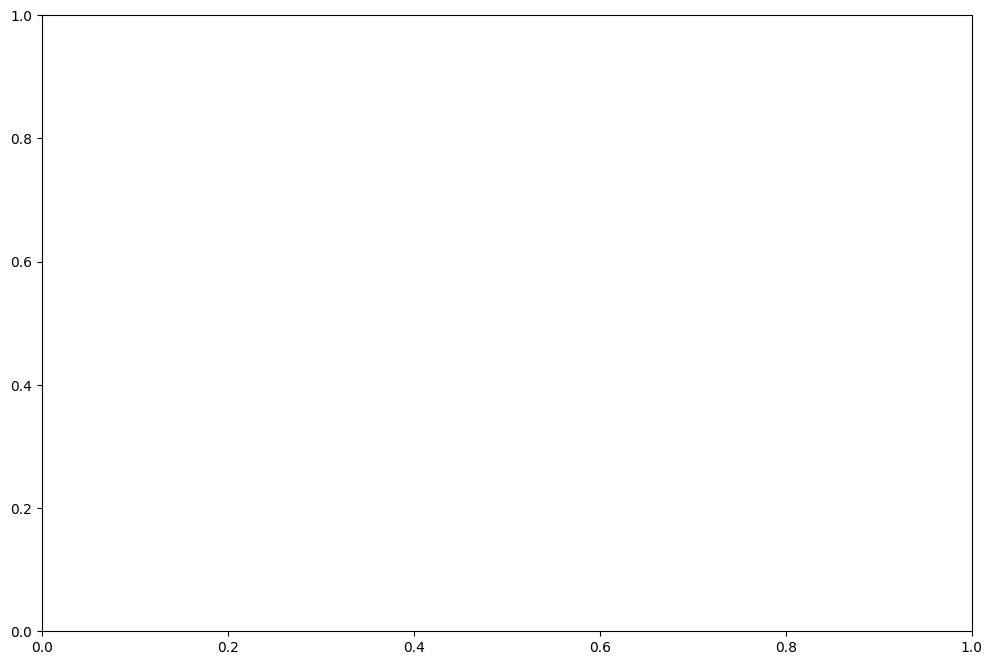

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))
explode = (0, 0.1, 0)  # Memberi efek explode pada slice kedua

# Warna untuk setiap slice (opsional, bisa disesuaikan dengan preferensi)
my_colors = ['#ff9999', '#77dd77', '#66b3ff']

# Buat pie chart
wedges, texts, autotexts = ax.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%',
                                  explode=explode, colors=my_colors, startangle=140, shadow=True)

# Tambahkan persentase jumlahnya di dalam pie chart
for autotext in autotexts:
    autotext.set_fontsize(14)

# Judul dan konfigurasi lainnya
ax.set_title('Persentase Sentimen Penjualan Misoprostol /nIlegal di Twitter', color='black', weight='bold', fontsize=20)

# Tampilkan legenda di luar pie chart
plt.legend(bbox_to_anchor=(1, 0.6), labels=['Negative', 'Positive', 'Netral'])

plt.show()

In [ ]:
dfsa.columns

Index(['Unnamed: 0', 'created_at', 'Description', 'username', 'Item_url',
       'full_text_no_doubel', 'full_text_noalay', 'full_text_no_stopwords',
       'full_text_translate', 'full_text_stemmer', 'prepos_text',
       'polarity_score', 'polarity'],
      dtype='object')

In [ ]:
dfsa.head()

,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer,prepos_text,polarity_score,polarity
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...,"[siap, saham, maret, obat, aborsi, mcg, amp, m...",-10,negatif
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...,"[jual, obat, tukang, gugur, kandung, kandung, ...",-11,negatif
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...,"[pesan, lalu, tokopedia, rab, maret, nyata, te...",-3,negatif
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...,"[konsultasi, mbak, cepat, duduk, atur, banget,...",-10,negatif
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...,"[dapat, harga, spesial, hanya, di, bulan, mare...",7,positif


In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(dfsa['full_text_stemmer'], dfsa['polarity'], test_size=0.2, random_state=42)

# Mengubah teks menjadi representasi numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Membuat model Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9318801089918256
Classification Report:
               precision    recall  f1-score   support

     negatif       0.93      0.99      0.96       269
      netral       0.86      0.71      0.78        45
     positif       0.98      0.85      0.91        53

    accuracy                           0.93       367
   macro avg       0.93      0.85      0.88       367
weighted avg       0.93      0.93      0.93       367



In [ ]:
# Hapus baris yang memiliki nilai 'netral' pada kolom Polarity
data_cleaned = dfsa[dfsa['polarity'] != 'netral']
data_cleaned['Sentiment'] = data_cleaned['polarity'].map({'positif': 1, 'negatif': 0})
data_cleaned

<ipython-input-28-90c404ce0f29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sentiment'] = data_cleaned['polarity'].map({'positif': 1, 'negatif': 0})


,Unnamed: 0,created_at,Description,username,Item_url,full_text_no_doubel,full_text_noalay,full_text_no_stopwords,full_text_translate,full_text_stemmer,prepos_text,polarity_score,polarity,Sentiment
0,0,Thu Mar 07 01:30:20 +0000 2024,Ready stok maret Obat aborsi mcg amp mcg...,newsjessy686,https://twitter.com/newsjessy686/status/176555...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Ready stok maret Obat aborsi mcg amp mcg pengu...,Siap saham maret Obat aborsi mcg amp mcg memba...,siap saham maret obat aborsi mcg amp mcg batal...,"[siap, saham, maret, obat, aborsi, mcg, amp, m...",-10,negatif,0
1,1,Thu Mar 07 00:20:53 +0000 2024,Jual Obat Penggugur Kandungan Obat Aborsi Cyto...,ApotikFitr70291,https://twitter.com/ApotikFitr70291/status/176...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Pengugur Kandungan Obat Aborsi Cytot...,Jual Obat Tukang menggugurkan kandungan Kandun...,jual obat tukang gugur kandung kandung obat ab...,"[jual, obat, tukang, gugur, kandung, kandung, ...",-11,negatif,0
2,2,Wed Mar 06 23:04:53 +0000 2024,Pesanan hari ini Via Tokopedia Rab Maret Re...,ObatCytotec07,https://twitter.com/ObatCytotec07/status/17655...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan hari ini Via Tokopedia Rab Maret Real ...,Pesanan Via Tokopedia Rab Maret Real testimoni...,Pesanan Melalui Tokopedia Rab Maret Nyata test...,pesan lalu tokopedia rab maret nyata testimoni...,"[pesan, lalu, tokopedia, rab, maret, nyata, te...",-3,negatif,0
3,3,Wed Mar 06 18:45:56 +0000 2024,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,prochoiceID,https://twitter.com/prochoiceID/status/1765448...,Konsultasi sm Mbak cepet aja kok Sat set bgt g...,Konsultasi sama Mbak cepat saja kok Sat set ba...,Konsultasi Mbak cepat Sat set banget pakai pak...,Konsultasi Mbak cepat Duduk mengatur banget pa...,konsultasi mbak cepat duduk atur banget pakai ...,"[konsultasi, mbak, cepat, duduk, atur, banget,...",-10,negatif,0
4,4,Wed Mar 06 18:37:09 +0000 2024,Get special price only at March Were celebr...,prochoiceID,https://twitter.com/prochoiceID/status/1765446...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Get special price only at March Were celebrati...,Dapatkan harga spesial hanya di bulan Maret. S...,dapat harga spesial hanya di bulan maret sedan...,"[dapat, harga, spesial, hanya, di, bulan, mare...",7,positif,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,1836,Mon May 13 15:33:21 +0000 2024,Telat menstruasi atau datang bulan langsung ch...,prochoiceID,https://x.com/prochoiceID/status/1790042655927...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi atau datang bulan langsung ch...,Telat menstruasi chat Real testimoni amanah ob...,Telat menstruasi mengobrol Nyata testimoni ama...,telat menstruasi obrol nyata testimoni amanah ...,"[telat, menstruasi, obrol, nyata, testimoni, a...",5,positif,1
1835,1837,Mon May 13 15:29:25 +0000 2024,Informasi aborsi aman dan penjual obat amanah ...,prochoiceID,https://x.com/prochoiceID/status/1790041666117...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman dan penjual obat amanah ...,Informasi aborsi aman penjual obat amanah mura...,Informasi aborsi seorang pria penjual obat ama...,informasi aborsi orang pria jual obat amanah m...,"[informasi, aborsi, orang, pria, jual, obat, a...",-6,negatif,0
1836,1838,Fri May 31 16:53:31 +0000 2024,Cari obat misoprostol misotab nusoter cytotec ...,leaaachilia,https://x.com/leaaachilia/status/1796585812286...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Cari obat misoprostol misotab nusoter cytotec ...,Menemukan obat misoprostol misotab nusoter sit...,temu obat misoprostol misotab nusoter sitotek ...,"[temu, obat, misoprostol, misotab, nusoter, si...",-2,negatif,0
1837,1839,Fri May 31 08:55:25 +00

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Split data into train and test sets
X = data_cleaned['full_text_stemmer']
y = data_cleaned['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Create and fit the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9259259259259259
Confusion Matrix:
[[252   0]
 [ 24  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       252
           1       1.00      0.67      0.80        72

    accuracy                           0.93       324
   macro avg       0.96      0.83      0.88       324
weighted avg       0.93      0.93      0.92       324



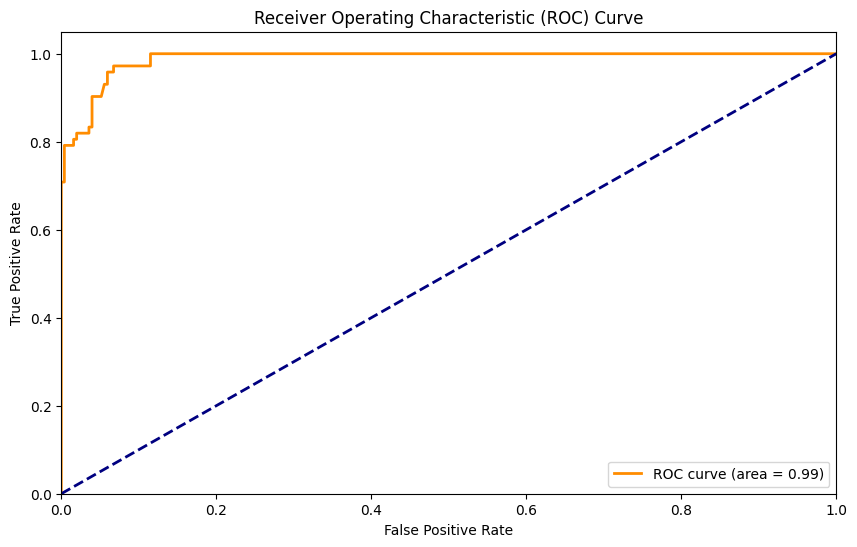

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<ipython-input-76-f9cd8f745c80>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color('blue')
<ipython-input-76-f9cd8f745c80>:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1].set_color('red')


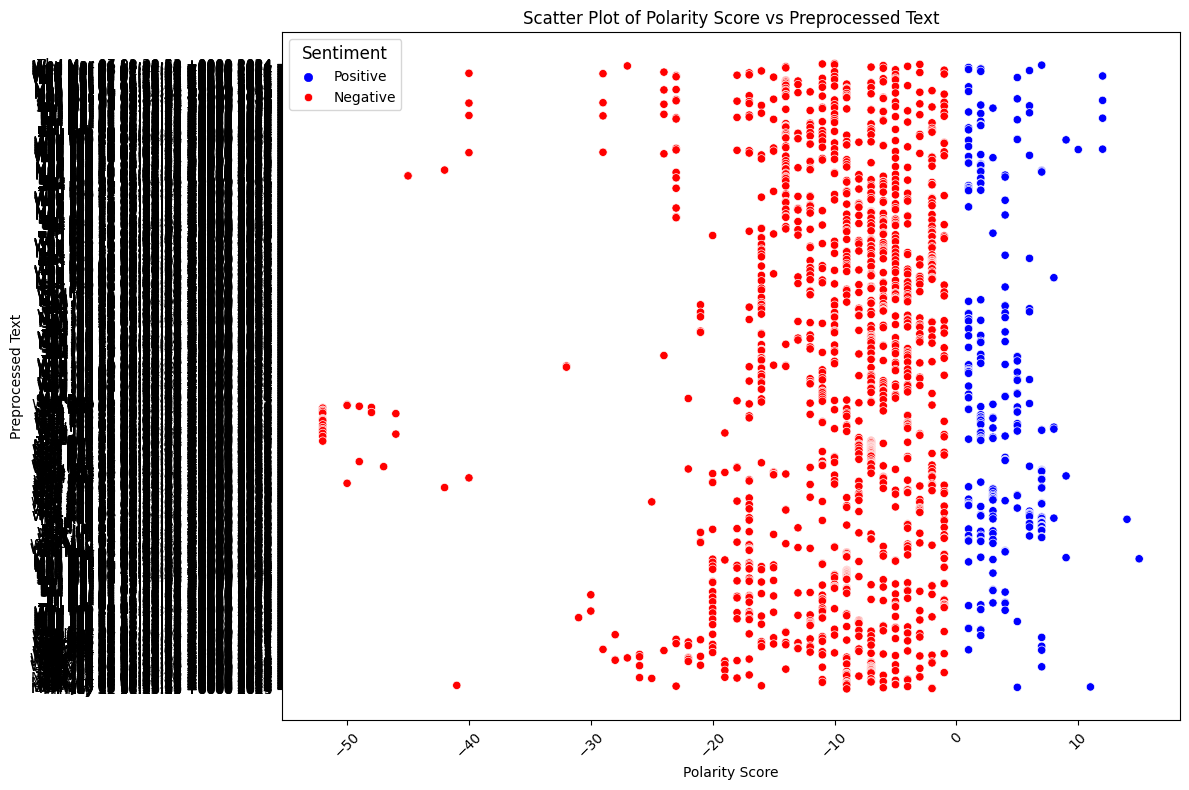

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_cleaned' is your DataFrame
# Adjust the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=data_cleaned, x='polarity_score', y='created_at', hue='Sentiment', palette={0: 'red', 1: 'blue'})

# Add the title and labels
plt.title('Scatter Plot of Polarity Score vs Preprocessed Text')
plt.xlabel('Polarity Score')
plt.ylabel('Preprocessed Text')

# Adjust the legend
legend = plt.legend(title='Sentiment', loc='upper left', labels=['Positive', 'Negative'], fontsize='medium', title_fontsize='large')
legend.legendHandles[0].set_color('blue')
legend.legendHandles[1].set_color('red')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


ValueError: Invalid RGBA argument: 'fanta'

Error in callback <function _draw_all_if_interactive at 0x7abf88797d90> (for post_execute):


ValueError: Invalid RGBA argument: 'fanta'

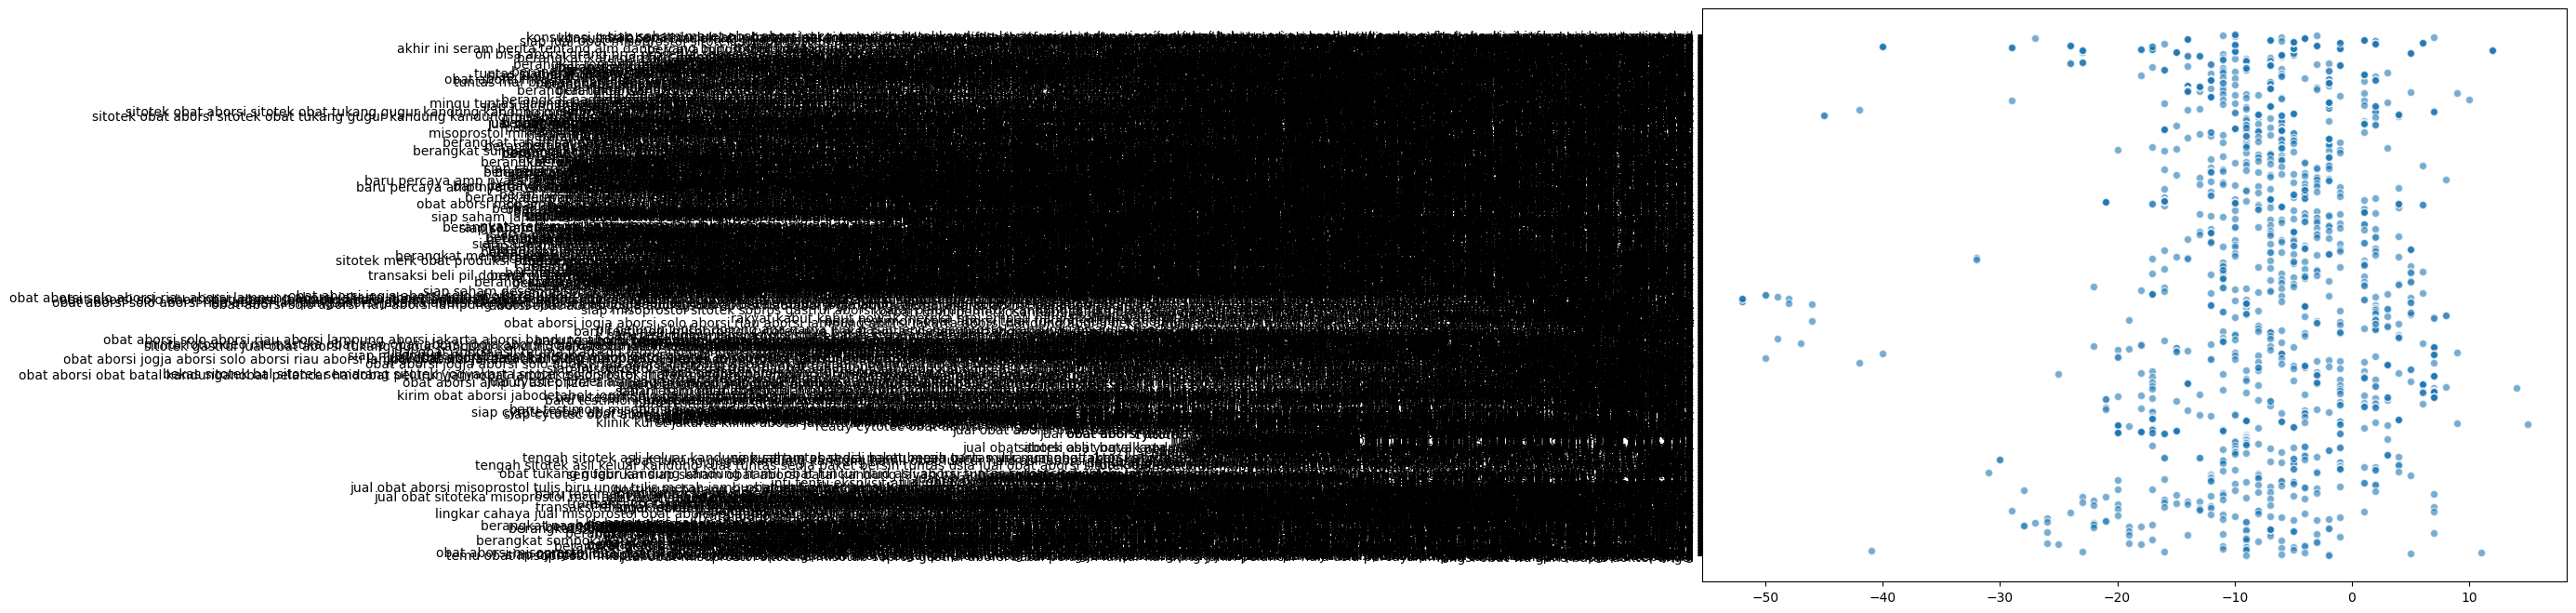

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan dataframe dfsa sudah terdefinisi dan berisi data yang diperlukan

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_cleaned, x='polarity_score', y='full_text_stemmer', hue='polarity', palette={'positif': 'blue', 'negatif': 'magenta'}, alpha=0.6)

plt.title('Scatter Plot of Polarity Score vs Preprocessed Text')
plt.xlabel('Polarity Score')
plt.ylabel('Preprocessed Text')
plt.legend(title='Sentiment', loc='upper left', labels=['Negative', 'Positive'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
